In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('E:\Downloads\SOCIAL Drive - Downloads\Files\Files\home\jovyan\work\eda_label_encoding_dataset.csv')
df.head()

,date,number_of_strikes,center_point_geom
0,8/5/2016,16,POINT(-101.5 24.7)
1,8/5/2016,16,POINT(-85 34.3)
2,8/5/2016,16,POINT(-89 41.4)
3,8/5/2016,16,POINT(-89.8 30.7)
4,8/5/2016,16,POINT(-86.2 37.9)


In [3]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month_name().str[:3]

In [4]:
months = ['Jan', 'Feb', 'Mar', "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)

df['year'] = df['date'].dt.year

In [6]:
df_by_month = df.groupby(['year', 'month'])['number_of_strikes'].sum().reset_index()
df_by_month.head()

,year,month,number_of_strikes
0,2016,Jan,32573
1,2016,Feb,31652
2,2016,Mar,200948
3,2016,Apr,266221
4,2016,May,579406


In [8]:
# Create a categorical variable by bucketing the number of lightning strikes 
# per month into severeness levels based on quantiles
df_by_month['strike_level'] = pd.qcut(
                                        df_by_month['number_of_strikes'],
                                        4,
                                        labels= ['Mild', 'Scattered', 'Heavy', 'Severe'])
df_by_month.head()

,year,month,number_of_strikes,strike_level
0,2016,Jan,32573,Mild
1,2016,Feb,31652,Mild
2,2016,Mar,200948,Scattered
3,2016,Apr,266221,Heavy
4,2016,May,579406,Severe


In [10]:
# Assign numerical Values to the strike levels
df_by_month['strike_level_code'] = df_by_month['strike_level'].cat.codes
df_by_month.head()

,year,month,number_of_strikes,strike_level,strike_level_code
0,2016,Jan,32573,Mild,0
1,2016,Feb,31652,Mild,0
2,2016,Mar,200948,Scattered,1
3,2016,Apr,266221,Heavy,2
4,2016,May,579406,Severe,3


In [13]:
# Create dummy variables from strike levels
pd.get_dummies(data=df_by_month['strike_level'], dtype=int)

,Mild,Scattered,Heavy,Severe
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1
5,0,0,0,1
6,0,0,0,1
7,0,0,0,1
8,0,0,1,0
9,0,1,0,0


In [16]:
df_by_month_plot = df_by_month.pivot(index='year', columns='month', values='strike_level_code')
df_by_month_plot.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2016,0,0,1,2,3,3,3,3,2,1,0,0
2017,1,0,1,2,2,2,3,3,2,1,0,0
2018,1,2,1,1,2,3,3,3,2,1,0,0


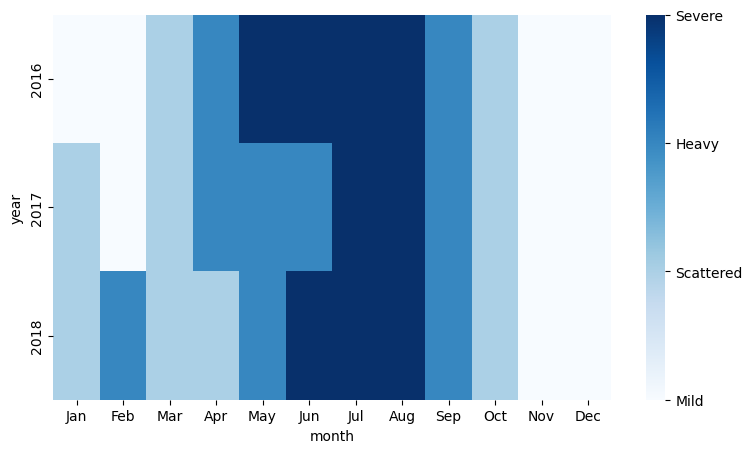

In [35]:
plt.figure(figsize=(9,5))
ax = sns.heatmap(df_by_month_plot, cmap='Blues',)
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0, 1, 2, 3])
colorbar.set_ticklabels(['Mild', "Scattered", 'Heavy', "Severe"])
plt.show()